<a href="https://colab.research.google.com/github/Resia05/unsupervised_learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Завдання 1. Завантаження. Знайомство з даними

**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', sep="\t").set_index('ID')
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [ ]:
data.shape

(2240, 28)

In [ ]:
data.duplicated().sum()

182

In [ ]:
# Перевірка пропусків та нулів
def check_missing(df):
    # Кількість пропущених значень
    missing_count = df.isnull().sum()

    # Кількість нулів
    zero_count = (df == 0).sum()

    # Загальна кількість записів
    total_count = df.shape[0]

    # Відсоток пропущених значень
    missing_percentage = (missing_count / total_count) * 100

    # Відсоток нулів
    zero_percentage = (zero_count / total_count) * 100

    # Створення DataFrame для результатів
    result_missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Zero Count': zero_count,
        'Missing Percentage': missing_percentage,
        'Zero Percentage': zero_percentage
    })

    return result_missing_df

In [ ]:
# Перевірка пропусків та нулів на повному наборі даних
print("Missing and Zero Values:")
missing_zero = check_missing(data)
missing_zero

Missing and Zero Values:


,Missing Count,Zero Count,Missing Percentage,Zero Percentage
Year_Birth,0,0,0.000000,0.000000
Education,0,0,0.000000,0.000000
Marital_Status,0,0,0.000000,0.000000
Income,24,0,1.071429,0.000000
Kidhome,0,1293,0.000000,57.723214
Teenhome,0,1158,0.000000,51.696429
Dt_Customer,0,0,0.000000,0.000000
Recency,0,28,0.000000,1.250000
MntWines,0,13,0.000000,0.580357
MntFruits,0,400,0.000000,17.857143


Розмір нашого набору даних 2240 рядків, 29 стовпців. Пропуски є в стовпці Income - 24 рядки. Типи даних float64(1), int64(25), object(3)

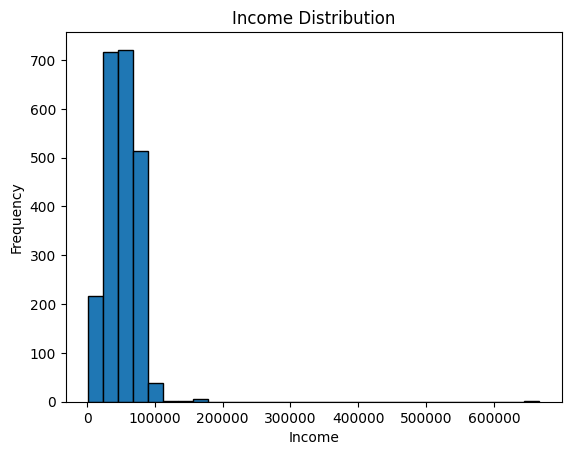

In [ ]:
import matplotlib.pyplot as plt

data['Income'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


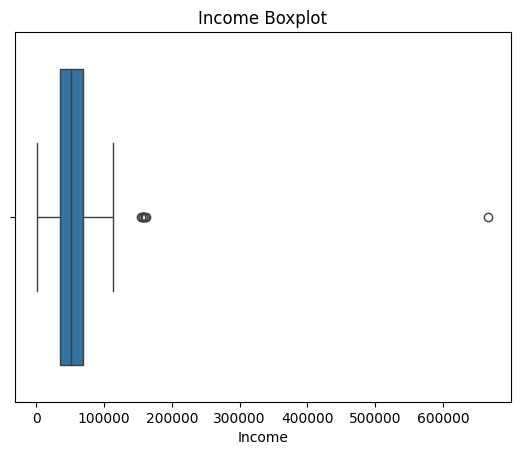

In [ ]:
import seaborn as sns

sns.boxplot(x=data['Income'])
plt.title('Income Boxplot')
plt.show()

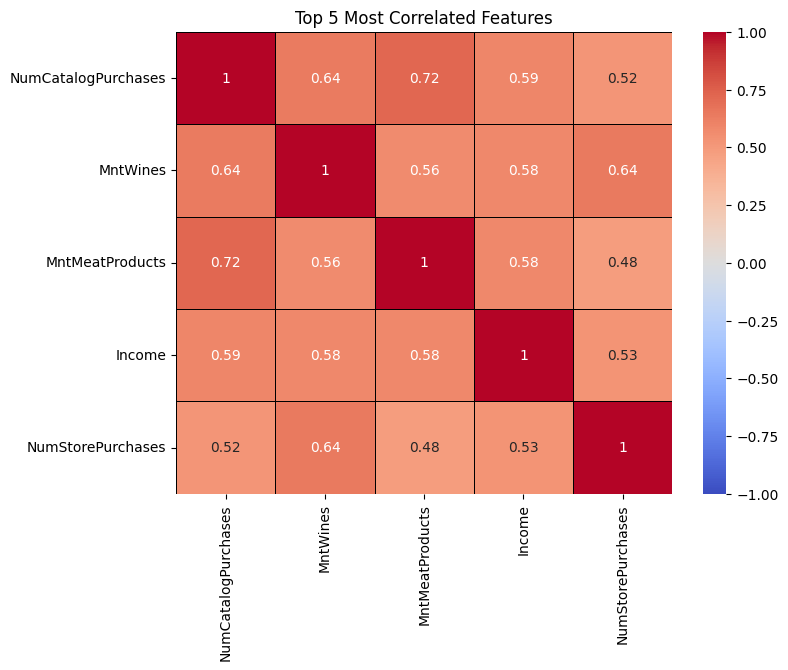

In [ ]:
# Відбір тільки числових стовпців
numeric_data = data.select_dtypes(include=['number'])

# Обчислення кореляційної матриці тільки для числових даних
correlation_matrix = numeric_data.corr()

# Вибір топ-5 найбільш корельованих ознак
# Знаходження середніх абсолютних кореляцій для кожного стовпця
mean_corr = correlation_matrix.abs().mean().sort_values(ascending=False)

# Вибір топ-5 ознак з найбільшою середньою кореляцією
top_5_columns = mean_corr.index[:5]

# Створення кореляційної матриці для цих 5 ознак
top_5_correlation_matrix = correlation_matrix.loc[top_5_columns, top_5_columns]

# Візуалізація теплової карти для топ-5 ознак
plt.figure(figsize=(8, 6))
sns.heatmap(top_5_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')
plt.title('Top 5 Most Correlated Features')
plt.show()

# Завдання 2. Пропуски

:**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [ ]:
from sklearn.impute import KNNImputer

# Створити і використовувати KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_data_filled = imputer.fit_transform(numeric_data)

# Перетворити результат назад у DataFrame
numeric_data_filled = pd.DataFrame(numeric_data_filled, columns=numeric_data.columns, index=numeric_data.index)

# Замінити числові стовпці у вихідному DataFrame
data[numeric_data.columns] = numeric_data_filled

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52224.992589,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25120.693674,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51369.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68413.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Описова статистика практично не змінилась. Тому вважаю, що можна використати цей метод. Не хотіла використовувати стандартну заміну середнє чи медіана, так як у нас нестандартна задача.

# Завдання 3. Перетворення в числовий формат. Масштабування.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [ ]:
unique_dates = data['Dt_Customer'].unique()
unique_dates

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
data['Dt_Customer']

,Dt_Customer
ID,
5524,2012-09-04
2174,2014-03-08
4141,2013-08-21
6182,2014-02-10
5324,2014-01-19
...,...
10870,2013-06-13
4001,2014-06-10
7270,2014-01-25


In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist() # для кодування
categorical_columns

['Education', 'Marital_Status']

In [ ]:
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Колонка '{column}' має наступні унікальні значення: {unique_values}")

Колонка 'Education' має наступні унікальні значення: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Колонка 'Marital_Status' має наступні унікальні значення: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Створюємо нові колонки для дати
data['Year'] = data['Dt_Customer'].dt.year
data['Month'] = data['Dt_Customer'].dt.month
data['Day'] = data['Dt_Customer'].dt.day
data['DayOfWeek'] = data['Dt_Customer'].dt.dayofweek

# One-Hot Encoding для категоріальних колонок
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_cats = one_hot_encoder.fit_transform(data[categorical_columns])

# Створюємо DataFrame з закодованими категоріями
encoded_cat_df = pd.DataFrame(encoded_cats, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Видаляємо старі категоріальні колонки і колонку дати
data = data.drop(columns=categorical_columns + ['Dt_Customer'])

# Об'єднуємо з основним DataFrame
data = pd.concat([data.reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)
data

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2012,9,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,3,8,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,8,21,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,2,10,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,19,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,6,13,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,1946.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0,2014,6,10,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,1981.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,25,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,1956.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,24,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Дата розбита на складові (рік, місяць, день, день тижня), категоріальні закодовані. Так як унікальних значень небагато, то групування не робила.

In [ ]:
from datetime import datetime

current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

data = data.drop(columns=['Year_Birth'])

In [ ]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2012,9,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0
1,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,3,8,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70.0
2,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,8,21,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0
3,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,2,10,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
4,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,19,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,6,13,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0
2236,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0,2014,6,10,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0
2237,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,25,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0
2238,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,24,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Збереження імен стовпців та індексів перед масштабуванням
columns = data.columns
index = data.index

# Ініціалізація MinMaxScaler
scaler = MinMaxScaler()

# Масштабування всіх стовпців
scaled_data = scaler.fit_transform(data)

# Перетворення масштабованих даних назад у DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns, index=index)

In [ ]:
scaled_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.727273,0.100000,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.233333,0.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.636364,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,0.300000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.600000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.145631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.454545,0.400000,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.281553
2236,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.454545,0.300000,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.485437
2237,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.800000,0.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.145631
2238,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.766667,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.388350


# Завдання 4. KMeans - перший результат кластеризації.

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Визначення X для кластеризації
X = scaled_df

# Ініціалізація KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Навчання моделі
kmeans.fit(X)

# Прогнозування кластерів
clusters = kmeans.predict(X)

# Додавання колонці з кластерами до DataFrame
scaled_df['Cluster'] = clusters

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X, clusters)

print("Silhouette Coefficient for the data Dataset Clusters:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient for the data Dataset Clusters: 0.22073405222628764


In [ ]:
# для перевірки результату зробила як в лекції

X2 = scaled_df

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X2)

labels = kmeans.predict(X2)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X2, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.22


Не подобається результат силуетного балу, тому спробую подубувати на топ 10 корельованих ознаках, а не на всьому наборі даних.

In [ ]:
import numpy as np

# Обчисліть кореляційну матрицю
correlation_matrix = scaled_df.corr()

# Виберіть лише числові стовпці
numeric_cols = scaled_df.select_dtypes(include=[np.number]).columns

# Візьміть кореляцію для числових стовпців
correlation_matrix = scaled_df[numeric_cols].corr()

# Для цього можна взяти найбільші значення в кореляційній матриці
correlation_scores = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Виберіть унікальні пари ознак
correlation_scores = correlation_scores[correlation_scores < 1]  # Виключіть самоперевірку
top_correlated_pairs = correlation_scores.head(10)

# Отримайте список унікальних ознак
top_features = set()
for feature_pair in top_correlated_pairs.index:
    top_features.update(feature_pair)

# Створіть новий DataFrame з топ ознаками
top_features_df = scaled_df[list(top_features)]

print("Топ ознаки для кластеризації:")
print(top_features)


Топ ознаки для кластеризації:
{'Marital_Status_Single', 'Marital_Status_Married', 'MntMeatProducts', 'NumStorePurchases', 'NumCatalogPurchases', 'Cluster', 'MntWines'}


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Отримання DataFrame з топ ознаками
X_top_features = scaled_df[list(top_features)]

# Ініціалізація KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Навчання моделі
kmeans.fit(X_top_features)

# Прогнозування кластерів
clusters = kmeans.predict(X_top_features)

# Додавання колонці з кластерами до DataFrame
scaled_df['Cluster'] = clusters

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X_top_features, clusters)

print("Силуетний бал:", silhouette_avg)

Силуетний бал: 0.5920514980816017


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Завдання 5. Візуалізація результатів

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [ ]:
import plotly.express as px

# Додаємо кластер до DataFrame для візуалізації
scaled_df['Cluster'] = clusters

# Створення 3D графіка розсіювання
fig = px.scatter_3d(
    scaled_df,
    x='Income',
    y='NumWebPurchases',
    z='NumStorePurchases',
    color='Cluster',
    labels={
        'Income': 'Річний дохід',
        'NumWebPurchases': 'Кількість покупок через вебсайт',
        'NumStorePurchases': 'Кількість покупок у магазинах',
        'Cluster': 'Кластер'
    },
    title='Візуалізація кластерів у 3D'
)

# Показати графік
fig.show()

In [ ]:
# Створення 2D графіка розсіювання
fig = px.scatter(
    scaled_df,
    x='Income',
    y='NumWebPurchases',
    color='Cluster',
    labels={
        'Income': 'Річний дохід',
        'NumWebPurchases': 'Кількість покупок через вебсайт',
        'Cluster': 'Кластер'
    },
    title='Візуалізація кластерів: Річний дохід vs Кількість покупок через вебсайт'
)

# Показати графік
fig.show()

In [ ]:
# Створення 3D графіка розсіювання
fig = px.scatter_3d(
    scaled_df,
    x='MntWines',
    y='NumStorePurchases',
    z='Income',
    color='Cluster',
    labels={
        'MntWines': 'Витрати на вино',
        'NumStorePurchases': 'Кількість покупок у магазинах',
        'Income': 'Річний дохід',
        'Cluster': 'Кластер'
    },
    title='Візуалізація кластерів: Витрати на вино vs Кількість покупок у магазинах vs Річний дохід'
)

# Показати графік
fig.show()


# Завдання 6. KMeans без масштабування

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

В мене вже були масштабовані дані, тому тут навпаки зроблю на оригінальних даних.

In [ ]:
from sklearn import metrics

X = data

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.53


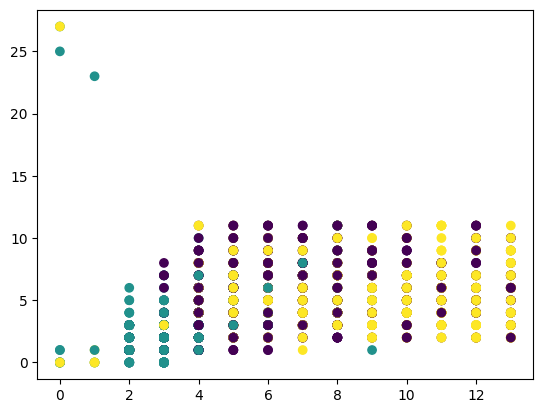

In [ ]:
plt.scatter(X['NumStorePurchases'], X['NumWebPurchases'], c=labels)
plt.show()

Результат без нормлізації виявився кращим на всіх даних. Але майже такого ж результату можна досягти змінивши стовпці для навчання.

# Опрацювання викидів.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [ ]:
display(data.head(5), scaled_df.head(5).round(2))

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2012,9,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0
1,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,3,8,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70.0
2,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,8,21,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0
3,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,2,10,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
4,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,19,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.0


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Cluster
0,0.08,0.0,0.0,0.59,0.43,0.44,0.32,0.66,0.33,0.24,0.20,0.30,0.36,0.31,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.73,0.10,0.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.38,0
1,0.07,0.5,0.5,0.38,0.01,0.01,0.00,0.01,0.00,0.02,0.13,0.04,0.04,0.15,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.18,0.23,0.83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.41,0
2,0.11,0.0,0.0,0.26,0.29,0.25,0.07,0.43,0.08,0.12,0.07,0.30,0.07,0.77,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.64,0.67,0.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.30,2
3,0.04,0.5,0.0,0.26,0.01,0.02,0.01,0.04,0.01,0.01,0.13,0.07,0.00,0.31,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.09,0.30,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.12,2
4,0.09,0.5,0.0,0.95,0.12,0.22,0.07,0.18,0.10,0.04,0.33,0.19,0.11,0.46,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.60,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.15,1


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def detect_outliers_iqr(df):
    outliers_iqr = set()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Додаємо індекси викидів до множини
        outliers_iqr.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

    return outliers_iqr

def detect_outliers_zscore(df, threshold=3):
    outliers_zscore = set()
    for col in df.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs(stats.zscore(df[col]))

        # Додаємо індекси викидів до множини
        outliers_zscore.update(df[z_scores > threshold].index)

    return outliers_zscore

def find_common_outliers(df):
    # Знаходимо викиди за обома методами для всього набору даних
    outliers_iqr = detect_outliers_iqr(df)
    outliers_zscore = detect_outliers_zscore(df)

    # Знаходимо перетин індексів викидів між двома методами
    common_outliers_indices = np.intersect1d(list(outliers_iqr), list(outliers_zscore))

    # Повертаємо спільні рядки, які є викидами для обох методів
    common_outliers_df = df.loc[common_outliers_indices]

    return common_outliers_df

# Використання функції для всього набору даних
common_outliers = find_common_outliers(data)

# Виведення спільних викидів для всього набору даних
print(f"Кількість спільних викидів: {len(common_outliers)}")
common_outliers


Кількість спільних викидів: 886


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
9,5648.0,1.0,1.0,68.0,28.0,0.0,6.0,1.0,1.0,13.0,1.0,1.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,3,13,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.0
11,7500.0,0.0,0.0,59.0,6.0,16.0,11.0,11.0,1.0,16.0,1.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2012,11,13,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0
12,63033.0,0.0,0.0,82.0,194.0,61.0,480.0,225.0,112.0,30.0,1.0,3.0,4.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,11,15,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65.0
15,82800.0,0.0,0.0,23.0,1006.0,22.0,115.0,59.0,68.0,45.0,1.0,7.0,6.0,12.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1.0,2012,11,24,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,78.0
18,76995.0,0.0,1.0,91.0,1012.0,80.0,498.0,0.0,16.0,176.0,2.0,11.0,4.0,9.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0,2013,3,28,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,11012.0,1.0,0.0,82.0,24.0,3.0,26.0,7.0,1.0,23.0,3.0,3.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,3,16,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0
2233,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,1.0,12.0,4.0,3.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,6,2,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0
2235,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,6,13,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0
2236,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0,2014,6,10,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0


Дуже багато даних з викидами. Потрібно змінити параметри пошуку.

In [ ]:
def detect_outliers_iqr(df):
    outliers_iqr = set()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = np.percentile(df[col], 0)
        Q3 = np.percentile(df[col], 99)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Додаємо індекси викидів до множини
        outliers_iqr.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

    return outliers_iqr

def detect_outliers_zscore(df, threshold=3):
    outliers_zscore = set()
    for col in df.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs(stats.zscore(df[col]))

        # Додаємо індекси викидів до множини
        outliers_zscore.update(df[z_scores > threshold].index)

    return outliers_zscore

def find_common_outliers(df):
    # Знаходимо викиди за обома методами для всього набору даних
    outliers_iqr = detect_outliers_iqr(df)
    outliers_zscore = detect_outliers_zscore(df)

    # Знаходимо перетин індексів викидів між двома методами
    common_outliers_indices = np.intersect1d(list(outliers_iqr), list(outliers_zscore))

    # Повертаємо спільні рядки, які є викидами для обох методів
    common_outliers_df = df.loc[common_outliers_indices]

    return common_outliers_df

# Використання функції для всього набору даних
common_outliers = find_common_outliers(data)

# Виведення спільних викидів для всього набору даних
print(f"Кількість спільних викидів: {len(common_outliers)}")
common_outliers


Кількість спільних викидів: 32


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
21,2447.0,1.0,0.0,42.0,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,1,6,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0
78,26326.0,0.0,0.0,12.0,1.0,0.0,5.0,0.0,3.0,9.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2013,9,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0
131,61331.0,1.0,1.0,42.0,534.0,5.0,47.0,0.0,5.0,41.0,5.0,11.0,1.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,3,10,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
138,35860.0,1.0,1.0,37.0,15.0,0.0,8.0,4.0,2.0,20.0,2.0,1.0,1.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2014,5,19,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
147,38547.0,1.0,0.0,49.0,6.0,1.0,10.0,0.0,1.0,4.0,1.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2013,8,28,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
153,34176.0,1.0,0.0,12.0,5.0,7.0,24.0,19.0,14.0,20.0,4.0,3.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,5,12,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
192,36640.0,1.0,0.0,99.0,15.0,6.0,8.0,7.0,4.0,25.0,1.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2013,9,26,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,124.0
271,31788.0,1.0,0.0,15.0,16.0,7.0,23.0,0.0,8.0,6.0,3.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2014,3,20,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
355,38643.0,1.0,1.0,45.0,22.0,2.0,14.0,0.0,1.0,10.0,2.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2013,11,29,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0
358,65073.0,0.0,0.0,65.0,629.0,17.0,177.0,69.0,0.0,8.0,1.0,5.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,0.0,2013,8,20,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,81.0


In [ ]:
# Оновлення персентилів для опису
percentiles = [0.5, 0.7, 0.9, 0.95, 0.97, 0.99]

# Додавання додаткових персентилів до опису
common_outliers.describe(percentiles=percentiles)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
count,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.0,32.000000,32.0,32.0,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0,32.000000,32.000000
mean,72191.000000,0.593750,0.468750,44.2500,172.625000,22.687500,258.000000,31.593750,14.437500,36.500000,3.375000,3.593750,4.593750,4.718750,5.250000,0.093750,0.0,0.062500,0.031250,0.0,0.656250,3.0,11.0,0.187500,2012.875000,6.15625,14.156250,2.812500,0.125000,0.0,0.593750,0.125000,0.156250,0.062500,0.093750,0.062500,0.312500,0.187500,0.218750,0.0,0.062500,55.343750
std,113604.062431,0.559918,0.567074,28.1551,204.247123,36.232615,491.970364,55.700153,27.023213,56.176565,3.414863,3.078116,8.143311,3.333451,2.747433,0.296145,0.0,0.245935,0.176777,0.0,0.482559,0.0,0.0,0.396558,0.707107,3.83624,8.951876,2.235166,0.336011,0.0,0.498991,0.336011,0.368902,0.245935,0.296145,0.245935,0.470929,0.396558,0.420013,0.0,0.245935,18.589989
min,2447.000000,0.000000,0.000000,3.0000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000,2012.000000,1.00000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,29.000000
50%,44435.000000,1.000000,0.000000,42.0000,34.000000,5.500000,48.500000,6.500000,3.000000,18.000000,3.000000,3.000000,1.000000,3.500000,6.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,3.0,11.0,0.000000,2013.000000,7.00000,13.000000,3.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,49.500000
70%,63950.400000,1.000000,1.000000,57.4000,275.000000,15.400000,155.800000,15.200000,7.700000,28.100000,3.000000,4.000000,3.700000,6.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,3.0,11.0,0.000000,2013.000000,9.00000,19.000000,4.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.0,0.000000,65.000000
90%,83029.500000,1.000000,1.000000,91.0000,501.600000,72.400000,581.000000,101.300000,57.900000,82.300000,5.000000,7.900000,10.000000,9.800000,8.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,3.0,11.0,1.000000,2014.000000,11.00000,27.800000,6.000000,0.900000,0.0,1.000000,0.900000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,72.700000
95%,158791.650000,1.000000,1.000000,92.4500,534.900000,102.900000,1668.350000,146.750000,78.000000,168.850000,10.600000,9.900000,28.000000,11.450000,8.000000,1.000000,0.0,0.450000,0.000000,0.0,1.000000,3.0,11.0,1.000000,2014.000000,11.00000,29.000000,6.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.450000,1.000000,0.450000,1.000000,1.000000,1.000000,0.0,0.450000,77.150000
97%,196213.410000,1.070000,1.070000,93.4200,542.510000,106.310000,1725.000000,199.910000,80.030000,180.830000,15.000000,11.000000,28.000000,12.070000,8.070000,1.000000,0.0,1.000000,0.070000,0.0,1.000000,3.0,11.0,1.000000,2014.000000,11.07000,29.070000,6.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,84.010000
99%,509848.470000,1.690000,1.690000,97.1400,600.170000,12

In [ ]:
# Створюємо копію набору даних для подальшого використання
data_without_outliers = data.copy()

# Заміна значень на медіанні значення
# Заміна значення більше 100000  у стовпці 'Income'

# Заміна значень у стовпці Income, які перевищують 100000, на медіанне значення
data_without_outliers.loc[data_without_outliers['Income'] > 100000, 'Income'] = median_income


# Заміна значення 1725.000000 у стовпці 'MntMeatProducts'
median_mnt_meat_products = data_without_outliers['MntMeatProducts'].median()
data_without_outliers['MntMeatProducts'].replace(1725.000000, median_mnt_meat_products, inplace=True)

# Заміна значення 15 у стовпці 'NumDealsPurchases'
median_num_deals_purchases = data_without_outliers['NumDealsPurchases'].median()
data_without_outliers['NumDealsPurchases'].replace(15, median_num_deals_purchases, inplace=True)

# Заміна значення 28 у стовпці 'NumCatalogPurchases'
median_num_catalog_purchases = data_without_outliers['NumCatalogPurchases'].median()
data_without_outliers['NumCatalogPurchases'].replace(28, median_num_catalog_purchases, inplace=True)

# Заміна значення 11 у стовпці 'NumWebPurchases'
median_num_web_purchases = data_without_outliers['NumWebPurchases'].median()
data_without_outliers['NumWebPurchases'].replace(11, median_num_web_purchases, inplace=True)

# Заміна значень більше 21 у стовпці 'NumWebPurchases' на медіанне значення
data_without_outliers.loc[data_without_outliers['NumWebPurchases'] > 21, 'NumWebPurchases'] = median_num_web_purchases

# Заміна значення більше 100 у стовпці 'Age'
median_age = data_without_outliers['Age'].median()
data_without_outliers.loc[data_without_outliers['Age'] > 100, 'Age'] = median_age

# Тепер data_without_outliers містить набір даних без викидів
# Перевіримо перші кілька рядків, щоб переконатися у правильності змін
data_without_outliers.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2012,9,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0
1,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,3,8,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70.0
2,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013,8,21,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0
3,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,2,10,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
4,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014,1,19,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.0


In [ ]:
data_without_outliers.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day,DayOfWeek,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51469.055714,0.444196,0.506250,49.109375,303.935714,26.302232,165.469643,37.525446,27.062946,44.021875,2.284375,3.908929,2.627232,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125,6.467411,15.638393,2.989732,0.090625,0.024107,0.503125,0.165179,0.216964,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893,55.096875
std,20465.882618,0.538398,0.544538,28.962453,336.597393,39.773434,220.874997,54.628979,41.280498,52.167439,1.797206,2.434439,2.771943,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554,3.486695,8.790680,1.999192,0.287139,0.153416,0.500102,0.371425,0.412270,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874,11.694144
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,51369.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,67897.500000,1.000000,1.000000,74.000000,504.250000,33.000000,230.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,65.000000
max,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1622.000000,259.000000,263.000000,362.000000,13.000000,10.000000,22.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000


Після опрацювання викидів, цікаво перевірити чи зміниться наш показник кластеризації.

## Повторна кластеризація після опрацювання викидів. BEST 0.71

Silhouette Coefficient for the data Dataset Clusters: 0.55


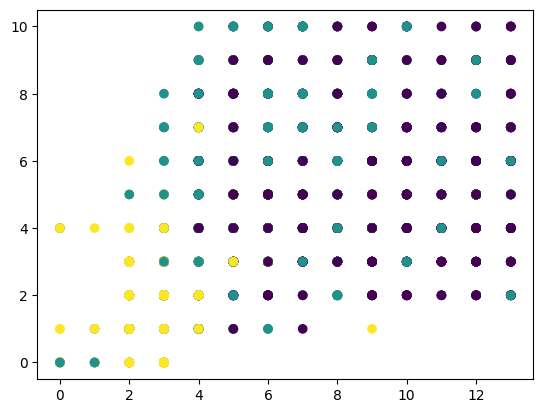

In [ ]:
X = data_without_outliers

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

plt.scatter(X['NumStorePurchases'], X['NumWebPurchases'], c=labels)
plt.show()

In [ ]:
# Масштабування всіх стовпців (окрім 'Cluster', якщо він є)
columns_to_scale = [col for col in columns if col != 'Cluster']
scaled_data = scaler.fit_transform(data_without_outliers[columns_to_scale])

# Перетворення масштабованих даних назад у DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=index)

# Додавання колонки з кластером для збереження структури даних
scaled_df['Cluster'] = data_without_outliers.get('Cluster', pd.Series(index=index))

# Визначення X для кластеризації
X = scaled_df.drop('Cluster', axis=1, errors='ignore')

# Ініціалізація KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Навчання моделі
kmeans.fit(X)

# Прогнозування кластерів
clusters = kmeans.predict(X)

# Додавання колонці з кластерами до DataFrame
scaled_df['Cluster'] = clusters

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X, clusters)

print("Silhouette Coefficient for the data without outliers Clusters:", silhouette_avg)

Silhouette Coefficient for the data without outliers Clusters: 0.14653802933841176


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Результат без викидів став ще гіршим, хоча на немасштабованих даних результат покращився.

In [ ]:
# Обчисліть кореляційну матрицю
correlation_matrix = scaled_df.corr()

# Виберіть лише числові стовпці
numeric_cols = scaled_df.select_dtypes(include=[np.number]).columns

# Візьміть кореляцію для числових стовпців
correlation_matrix = scaled_df[numeric_cols].corr()

# Для цього можна взяти найбільші значення в кореляційній матриці
correlation_scores = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Виберіть унікальні пари ознак
correlation_scores = correlation_scores[correlation_scores < 1]  # Виключіть самоперевірку
top_correlated_pairs = correlation_scores.head(10)

# Отримайте список унікальних ознак
top_features = set()
for feature_pair in top_correlated_pairs.index:
    top_features.update(feature_pair)

# Створіть новий DataFrame з топ ознаками
top_features_df = scaled_df[list(top_features)]

print("Топ ознаки для кластеризації:")
print(top_features)

# Отримання DataFrame з топ ознаками
X_top_features = top_features_df

# Ініціалізація KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Навчання моделі
kmeans.fit(X_top_features)

# Прогнозування кластерів
clusters = kmeans.predict(X_top_features)

# Додавання колонці з кластерами до DataFrame
scaled_df['Cluster'] = clusters

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X_top_features, clusters)

print("Силуетний бал для топ ознак:", silhouette_avg)


Топ ознаки для кластеризації:
{'Marital_Status_Single', 'Marital_Status_Married', 'MntMeatProducts', 'Income', 'NumCatalogPurchases', 'Cluster', 'MntWines'}
Силуетний бал для топ ознак: 0.712098752742655


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Стало суттєво краще, покищо це найкращий результат.
Діїі, які було зроблено: опрацьовано викиди, Scaler, кластеризація на основі топ 10 ознак по кореляції.

In [ ]:
import plotly.express as px

# Додаємо кластер до DataFrame для візуалізації
scaled_df['Cluster'] = clusters

# Створення 3D графіка розсіювання
fig = px.scatter_3d(
    scaled_df,
    x='Income',
    y='NumWebPurchases',
    z='NumStorePurchases',
    color='Cluster',
    labels={
        'Income': 'Річний дохід',
        'NumWebPurchases': 'Кількість покупок через вебсайт',
        'NumStorePurchases': 'Кількість покупок у магазинах',
        'Cluster': 'Кластер'
    },
    title='Візуалізація кластерів у 3D'
)

# Показати графік
fig.show()


# Завдання 8. Elbow

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

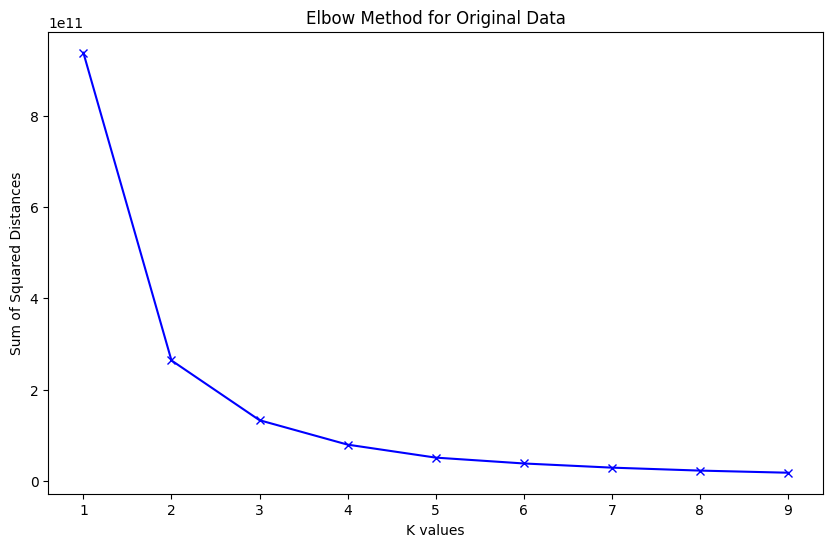

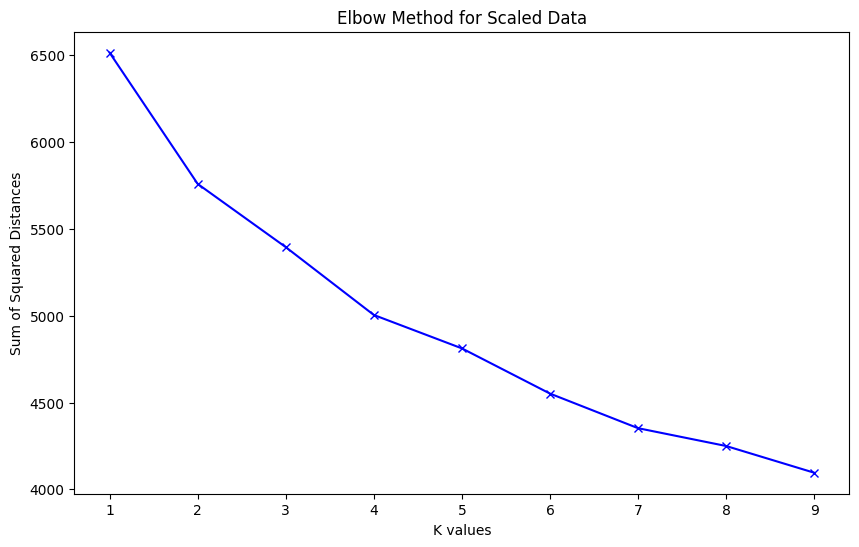

In [ ]:
# Створення X_orig та X_scal
X_orig = data_without_outliers.drop(columns=['Cluster'], errors='ignore')  # Вилучаємо колонку з кластерами, якщо вона є
X_scal = scaled_df.drop(columns=['Cluster'], errors='ignore')  # Вилучаємо колонку з кластерами, якщо вона є

# Функція для виконання Elbow методу
def elbow_method(X, title):
    K = range(1, 10)
    sum_of_squared_distances = []

    for k in K:
        model = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
        sum_of_squared_distances.append(model.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('K values')
    plt.ylabel('Sum of Squared Distances')
    plt.title(title)
    plt.show()

# Виконання Elbow методу для не масштабованих даних
elbow_method(X_orig, 'Elbow Method for Original Data')

# Виконання Elbow методу для масштабованих даних
elbow_method(X_scal, 'Elbow Method for Scaled Data')


Бачимо, що на масштабованих даних оптимальним значенням можна було б обрати К=2 чи. На оригінальних К=2.

In [ ]:
# Функція для натренування KMeans, обчислення силиуетного балу та візуалізації
def train_and_evaluate_kmeans(X, n_clusters, data_name):
    # Ініціалізація KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    clusters = kmeans.fit_predict(X)

    # Додавання кластерів до DataFrame
    X['Cluster'] = clusters

    # Обчислення метрики силуету
    silhouette_avg = silhouette_score(X, clusters)

    print(f"Silhouette Coefficient for {data_name} with {n_clusters} clusters:", silhouette_avg)

    # Візуалізація кластерів
    if X.shape[1] > 2:  # Перевіряємо, чи є більше 2 ознак для 3D графіка
        import plotly.express as px
        fig = px.scatter_3d(
            X,
            x=X.columns[0],
            y=X.columns[1],
            z=X.columns[2],
            color='Cluster',
            labels={
                'Cluster': 'Cluster'
            },
            title=f'Clusters Visualization for {data_name} with {n_clusters} clusters'
        )
        fig.show()
    else:  # Для 2D графіка
        plt.figure(figsize=(10, 6))
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', marker='o')
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.title(f'Clusters Visualization for {data_name} with {n_clusters} clusters')
        plt.colorbar(label='Cluster')
        plt.show()

# Тренування та оцінка для не масштабованих даних з K=2
train_and_evaluate_kmeans(X_orig, n_clusters=2, data_name='Original Data')

# Тренування та оцінка для масштабованих даних з K=2
train_and_evaluate_kmeans(X_scal, n_clusters=2, data_name='Scaled Data')

Silhouette Coefficient for Original Data with 2 clusters: 0.6073356509713503


Silhouette Coefficient for Scaled Data with 2 clusters: 0.18472187142526597


In [ ]:
# Тренування та оцінка для не масштабованих даних з K=5
train_and_evaluate_kmeans(X_orig, n_clusters=5, data_name='Original Data')

# Тренування та оцінка для масштабованих даних з K=5
train_and_evaluate_kmeans(X_scal, n_clusters=5, data_name='Scaled Data')


Silhouette Coefficient for Original Data with 5 clusters: 0.5416572070389261


Silhouette Coefficient for Scaled Data with 5 clusters: 0.24135393400746738


Попередньо отриманий результат був кращим. Але там важливим моментам було тренувати не на всіх даних, а на топ 10 по кореляції. Як для зміни кластерів - то результат став краще.

# Завдання 9. scipy dendrogram, linkage, fcluster

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

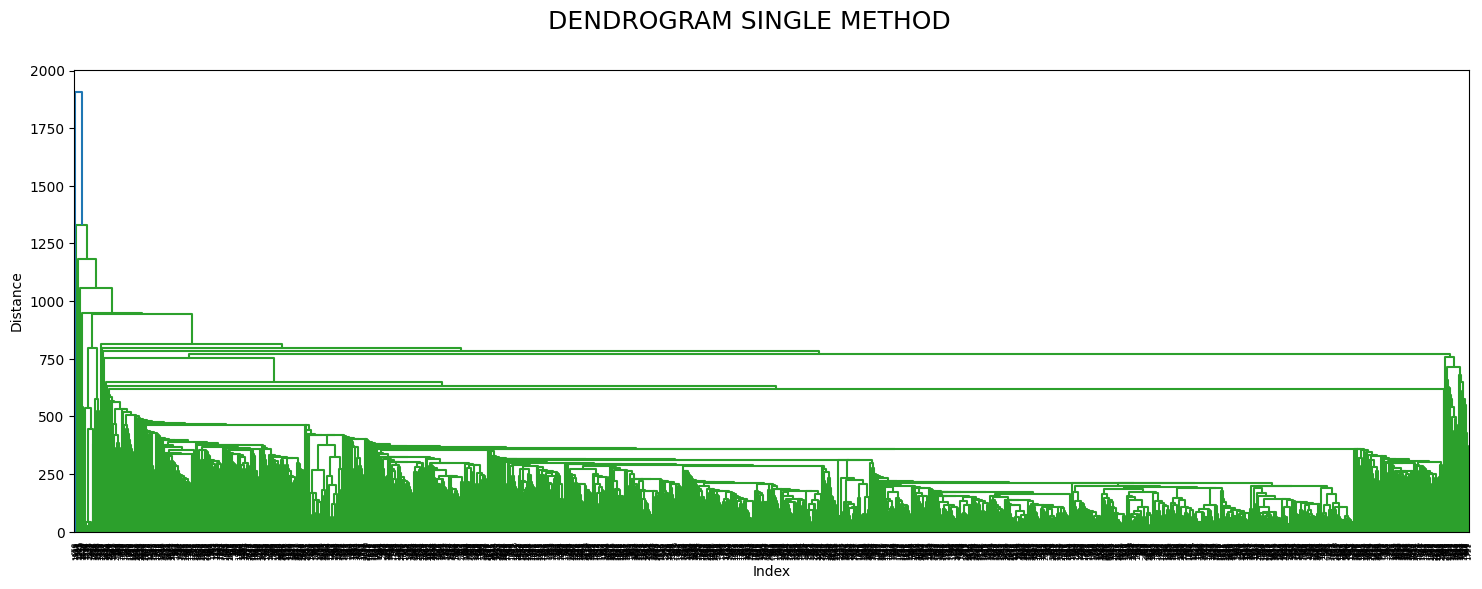

In [ ]:
dist_sin = linkage(data_without_outliers, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

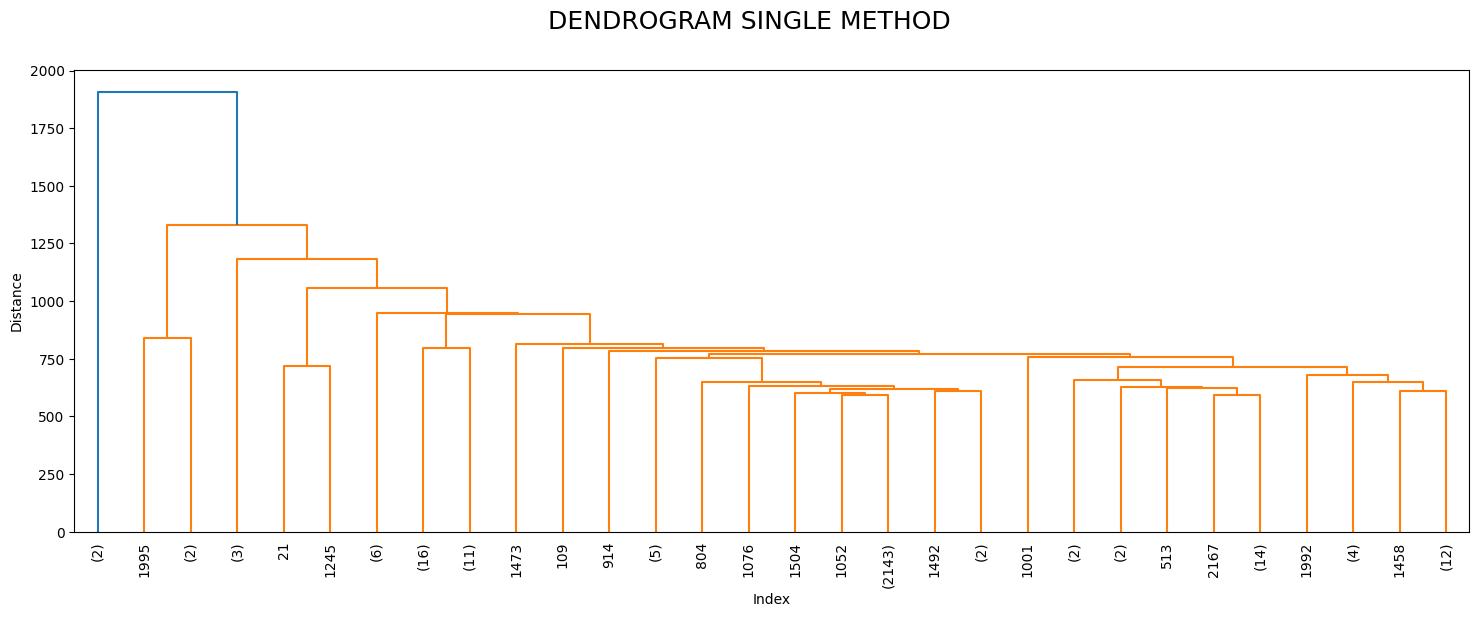

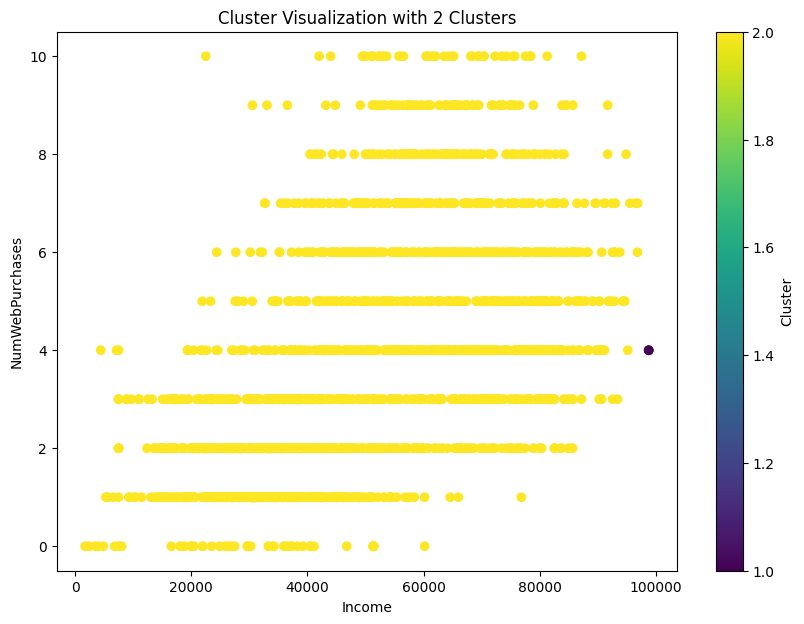

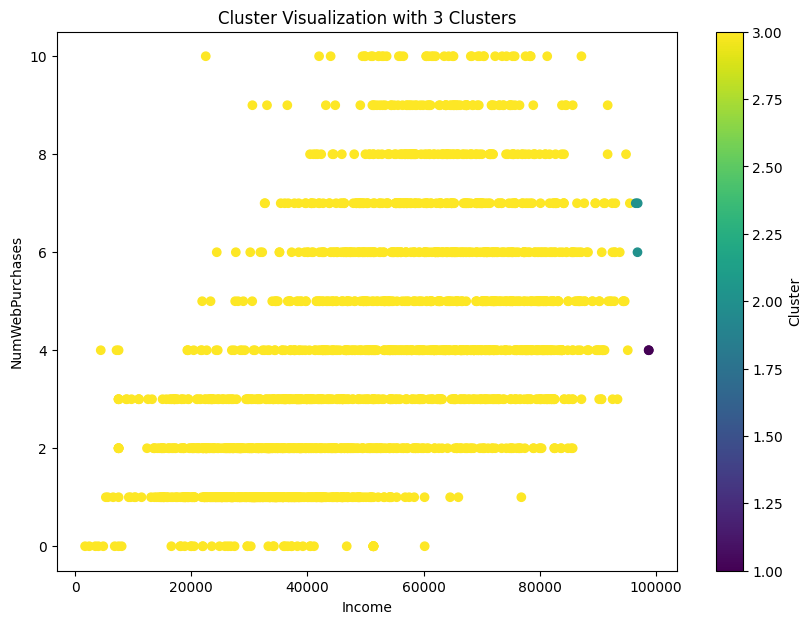

Silhouette Coefficient for 2 clusters: 0.39636595706508004
Silhouette Coefficient for 3 clusters: 0.3698479017744273


In [ ]:
import scipy.cluster.hierarchy as sch

# Вибір числових стовпців (на всякий випадок, хоча у нас і так всі мають бути числовими)
numeric_data = data_without_outliers.select_dtypes(include=[np.number])

# Обчисліть матрицю відстаней та виконання ієрархічної кластеризації
dist_sin = linkage(numeric_data, method="single")

# Візуалізація дендрограми з обрізанням до останніх 30 значень
plt.figure(figsize=(18, 6))
dendrogram(dist_sin, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD", fontsize=18)
plt.show()

# Кластеризація на 2 та 3 кластери
clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

# Додавання колонок з кластерами до DataFrame для візуалізації
data_without_outliers['Cluster_2'] = clusters_2
data_without_outliers['Cluster_3'] = clusters_3

# Візуалізація кластеризації на 2 кластери
plt.figure(figsize=(10, 7))
plt.scatter(data_without_outliers['Income'], data_without_outliers['NumWebPurchases'],
            c=data_without_outliers['Cluster_2'], cmap='viridis', label='Cluster 2')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')
plt.title('Cluster Visualization with 2 Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Візуалізація кластеризації на 3 кластери
plt.figure(figsize=(10, 7))
plt.scatter(data_without_outliers['Income'], data_without_outliers['NumWebPurchases'],
            c=data_without_outliers['Cluster_3'], cmap='viridis', label='Cluster 3')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')
plt.title('Cluster Visualization with 3 Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Обчислення метрики силуету
silhouette_avg_2 = silhouette_score(numeric_data, clusters_2)
silhouette_avg_3 = silhouette_score(numeric_data, clusters_3)

print("Silhouette Coefficient for 2 clusters:", silhouette_avg_2)
print("Silhouette Coefficient for 3 clusters:", silhouette_avg_3)


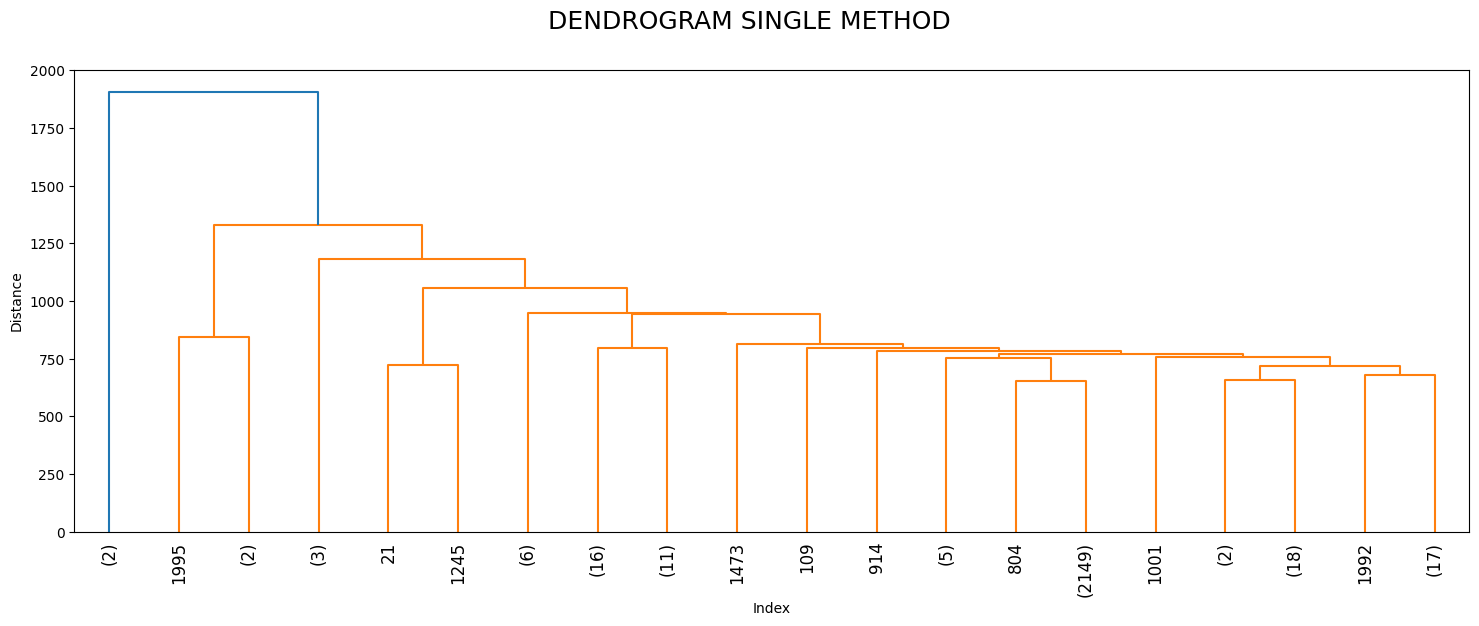

In [ ]:
# Візуалізація дендрограми з обрізанням до останніх 20 значень
plt.figure(figsize=(18, 6))
dendrogram(dist_sin, truncate_mode='lastp', p=20, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD", fontsize=18)
plt.show()


Цей метод не є ефективним на нашому наборі даних. Ні на повному, ні на "обрізаному"

# Завдання 10. DBSCAN. Аналіз метрик силуету. Вибір кращого результату завдання 6

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

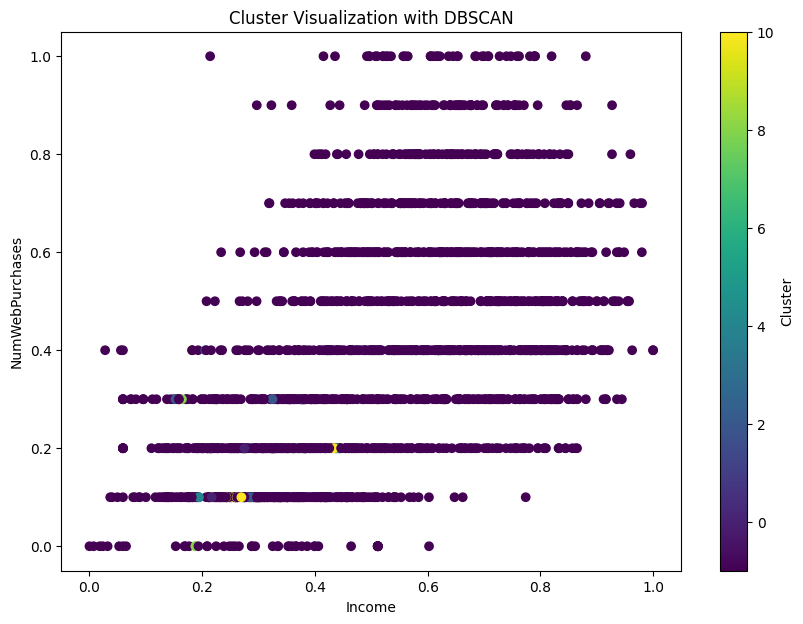

Silhouette Coefficient for DBSCAN: 0.008462164117793285


In [ ]:
from sklearn.cluster import DBSCAN


# Ініціалізація DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Навчання моделі
dbscan.fit(scaled_df)

# Прогнозування кластерів
clusters_dbscan = dbscan.labels_

# Додавання колонок з кластерами до DataFrame
scaled_df['Cluster_DBSCAN'] = clusters_dbscan

# Візуалізація кластеризації DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(scaled_df['Income'], scaled_df['NumWebPurchases'],
            c=scaled_df['Cluster_DBSCAN'], cmap='viridis', label='Cluster DBSCAN')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')
plt.title('Cluster Visualization with DBSCAN')
plt.colorbar(label='Cluster')
plt.show()

# Обчислення метрики силуету
# Зверніть увагу, що DBSCAN може створити шуми, які мають мітку -1, і їх потрібно виключити з розрахунків
if len(set(clusters_dbscan)) > 1:  # Переконатися, що є більше одного кластеру
    silhouette_avg_dbscan = silhouette_score(scaled_df, clusters_dbscan)
    print("Silhouette Coefficient for DBSCAN:", silhouette_avg_dbscan)
else:
    print("DBSCAN не знайшов жодних кластерів.")


In [ ]:
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

best_silhouette = -1
best_eps = eps_values[0]
best_min_samples = min_samples_values[0]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(scaled_df)

        # Переконайтесь, що є більше одного кластеру
        if len(set(clusters_dbscan)) > 1:
            silhouette_avg_dbscan = silhouette_score(scaled_df, clusters_dbscan)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Coefficient: {silhouette_avg_dbscan}")

            if silhouette_avg_dbscan > best_silhouette:
                best_silhouette = silhouette_avg_dbscan
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Coefficient: {best_silhouette}")


eps: 0.3, min_samples: 3, Silhouette Coefficient: -0.2853999040026057
eps: 0.5, min_samples: 3, Silhouette Coefficient: -0.36200725472195056
eps: 0.5, min_samples: 5, Silhouette Coefficient: 0.008462164117793285
eps: 0.7, min_samples: 3, Silhouette Coefficient: -0.24037852561588535
eps: 0.7, min_samples: 5, Silhouette Coefficient: -0.2611354213422075
eps: 0.7, min_samples: 10, Silhouette Coefficient: -0.22111932374880677
Best eps: 0.5, Best min_samples: 5, Best Silhouette Coefficient: 0.008462164117793285


Результат кластеризації дуже поганий. Ця метрика для нас не є корисною і використовувтаи для цього набору даних немає сенсу.

Для n_clusters = 2 Середнє значення silhouette_score становить: 0.12157156359428138
Для n_clusters = 3 Середнє значення silhouette_score становить: 0.12179463264020292
Для n_clusters = 4 Середнє значення silhouette_score становить: 0.13589864388145426
Для n_clusters = 5 Середнє значення silhouette_score становить: 0.16928469216086597
Для n_clusters = 6 Середнє значення silhouette_score становить: 0.137084465033105


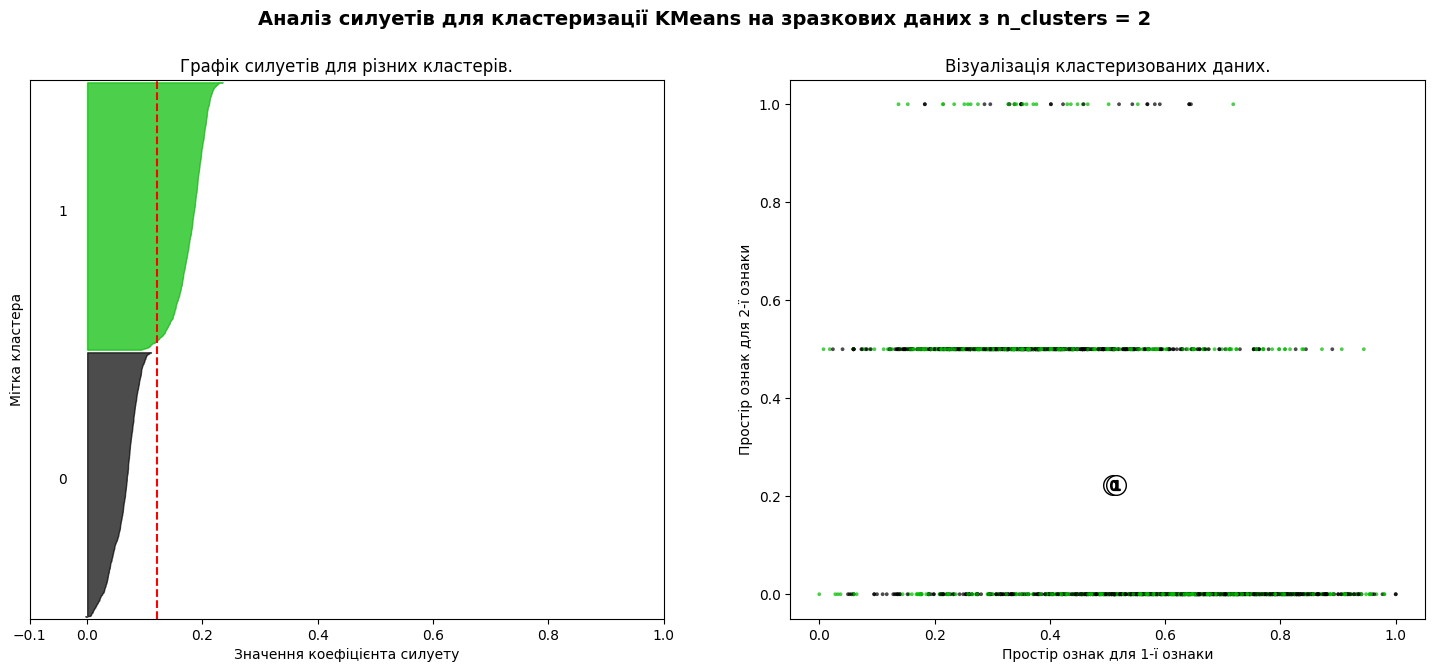

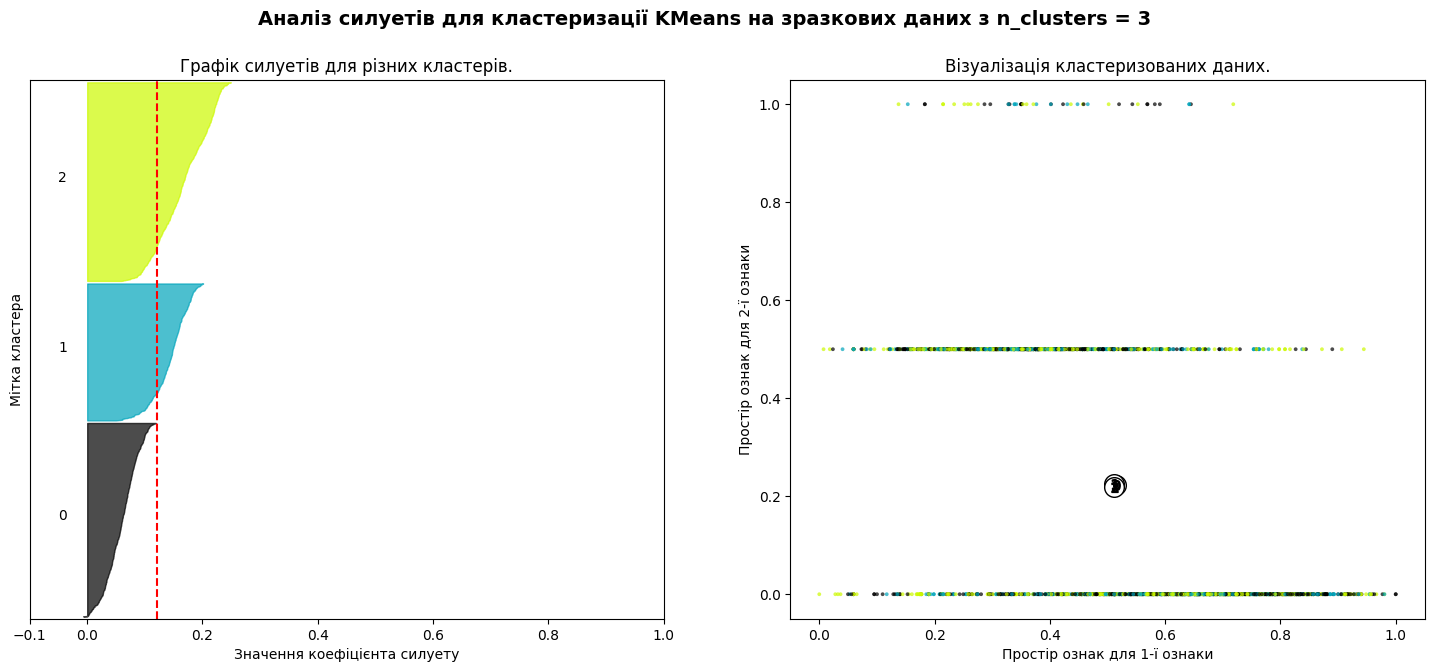

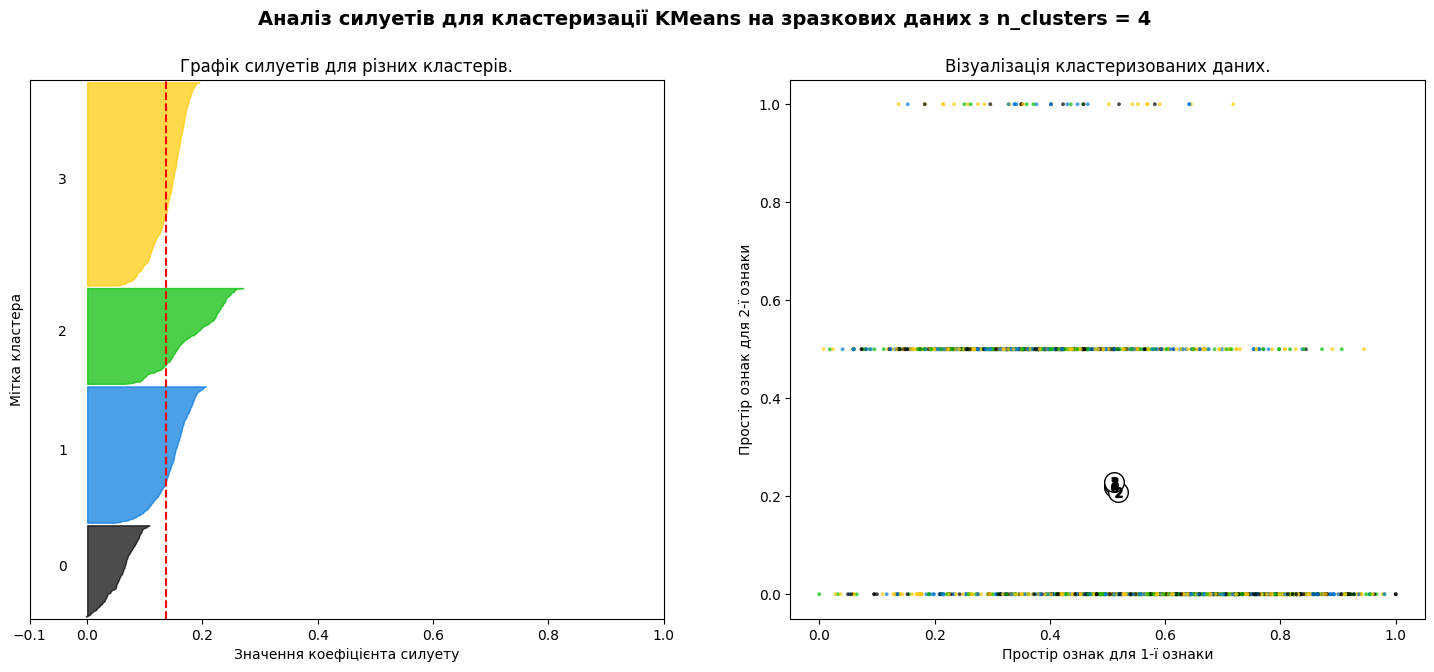

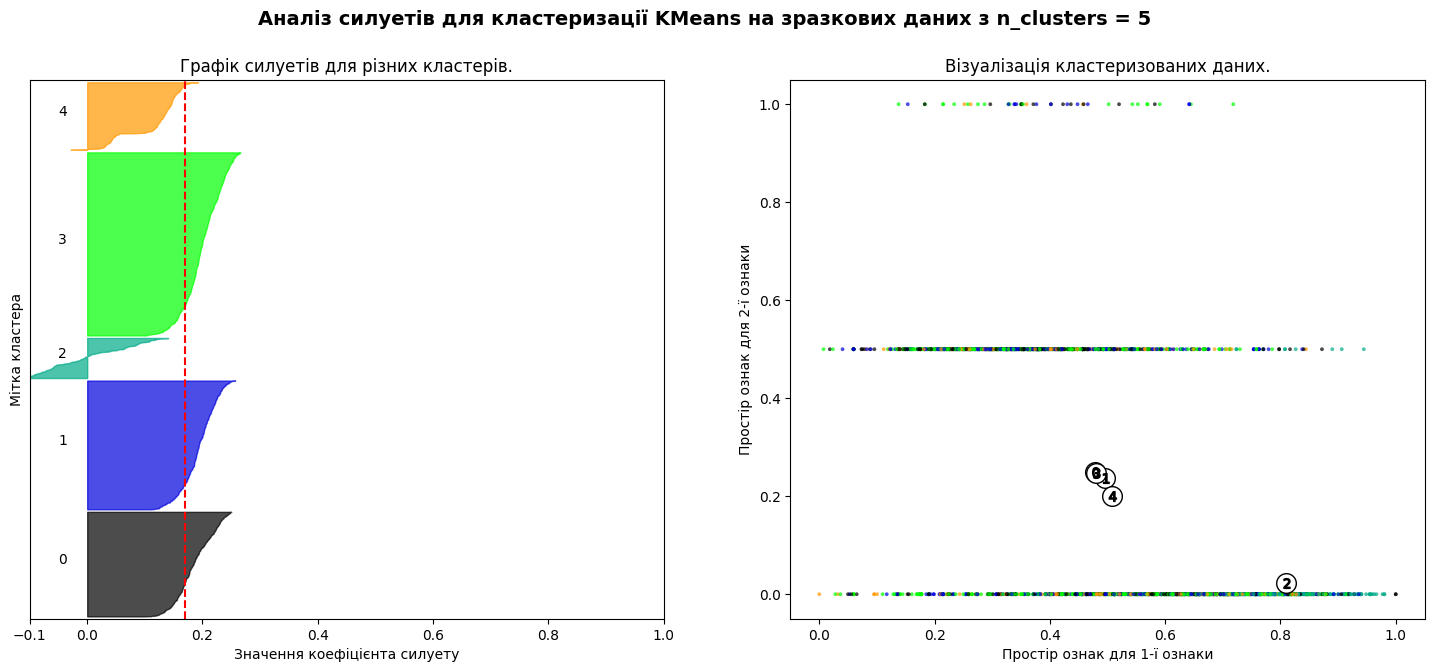

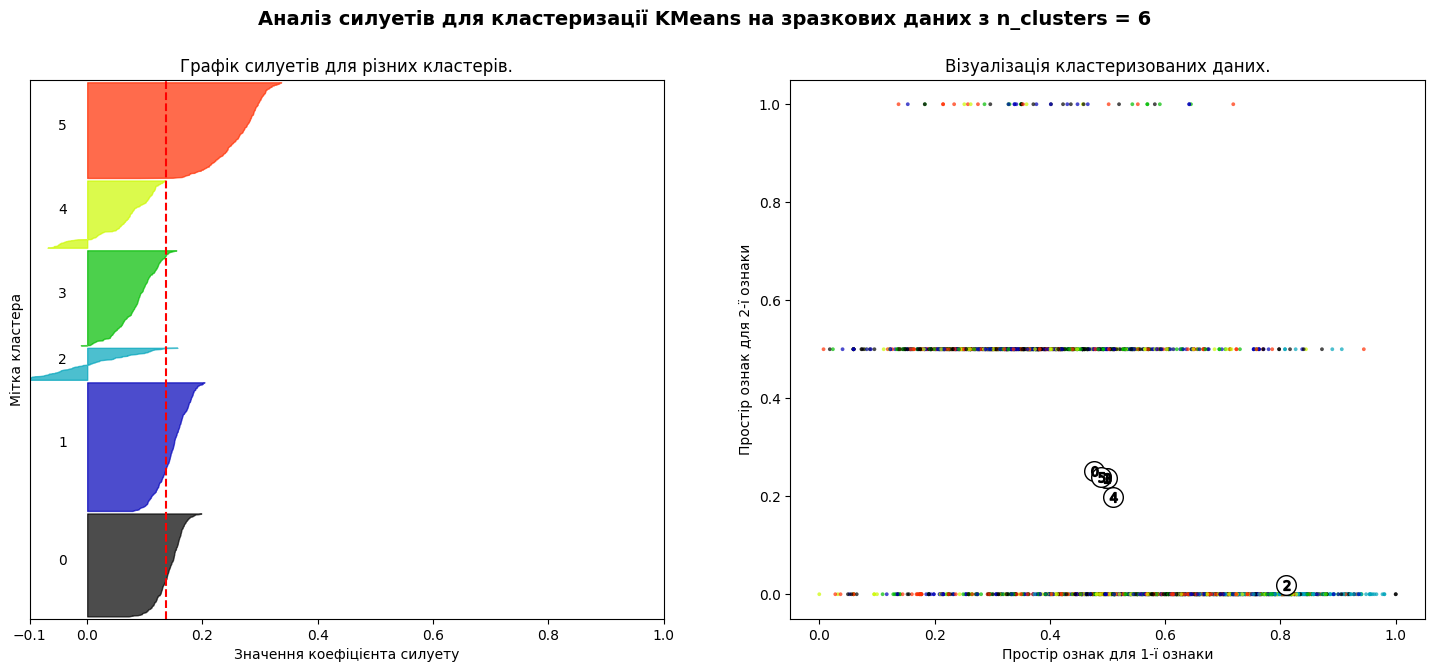

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Перетворення масштабованих даних назад у DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=index)

# Якщо колонка 'Cluster' є, видаляємо її
X = scaled_df.drop(columns=['Cluster'], errors='ignore')

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й підграфік - це графік силуетів
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Ініціюємо кластеризатор
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Для n_clusters =", n_clusters, "Середнє значення silhouette_score становить:", silhouette_avg)

    # Розраховуємо метрику силуету для кожного екземпляра в наборі даних
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Графік силуетів для різних кластерів.")
    ax1.set_xlabel("Значення коефіцієнта силуету")
    ax1.set_ylabel("Мітка кластера")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й підграфік, що показує фактично сформовані кластери
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Центри кластерів
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Візуалізація кластеризованих даних.")
    ax2.set_xlabel("Простір ознак для 1-ї ознаки")
    ax2.set_ylabel("Простір ознак для 2-ї ознаки")

    plt.suptitle(
        "Аналіз силуетів для кластеризації KMeans на зразкових даних з n_clusters = %d" % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [ ]:
# Вже маєте масштабовані дані у scaled_df
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=index)

# Обчисліть кореляційну матрицю
correlation_matrix = scaled_df.corr()

# Виберіть лише числові стовпці
numeric_cols = scaled_df.select_dtypes(include=[np.number]).columns

# Візьміть кореляцію для числових стовпців
correlation_matrix = scaled_df[numeric_cols].corr()

# Для цього можна взяти найбільші значення в кореляційній матриці
correlation_scores = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Виберіть унікальні пари ознак
correlation_scores = correlation_scores[correlation_scores < 1]  # Виключіть самоперевірку
top_correlated_pairs = correlation_scores.head(10)

# Отримайте список унікальних ознак
top_features = set()
for feature_pair in top_correlated_pairs.index:
    top_features.update(feature_pair)

# Створіть новий DataFrame з топ ознаками
top_features_df = scaled_df[list(top_features)]

print("Топ ознаки для кластеризації:")
print(top_features)

# Отримання DataFrame з топ ознаками
X_top_features = top_features_df


Топ ознаки для кластеризації:
{'MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Income', 'MntWines'}


Для n_clusters = 2 Середнє значення silhouette_score становить: 0.521079730149747
Для n_clusters = 3 Середнє значення silhouette_score становить: 0.403238121060085
Для n_clusters = 4 Середнє значення silhouette_score становить: 0.3944752629646075
Для n_clusters = 5 Середнє значення silhouette_score становить: 0.3644440743430315
Для n_clusters = 6 Середнє значення silhouette_score становить: 0.2789491230107716


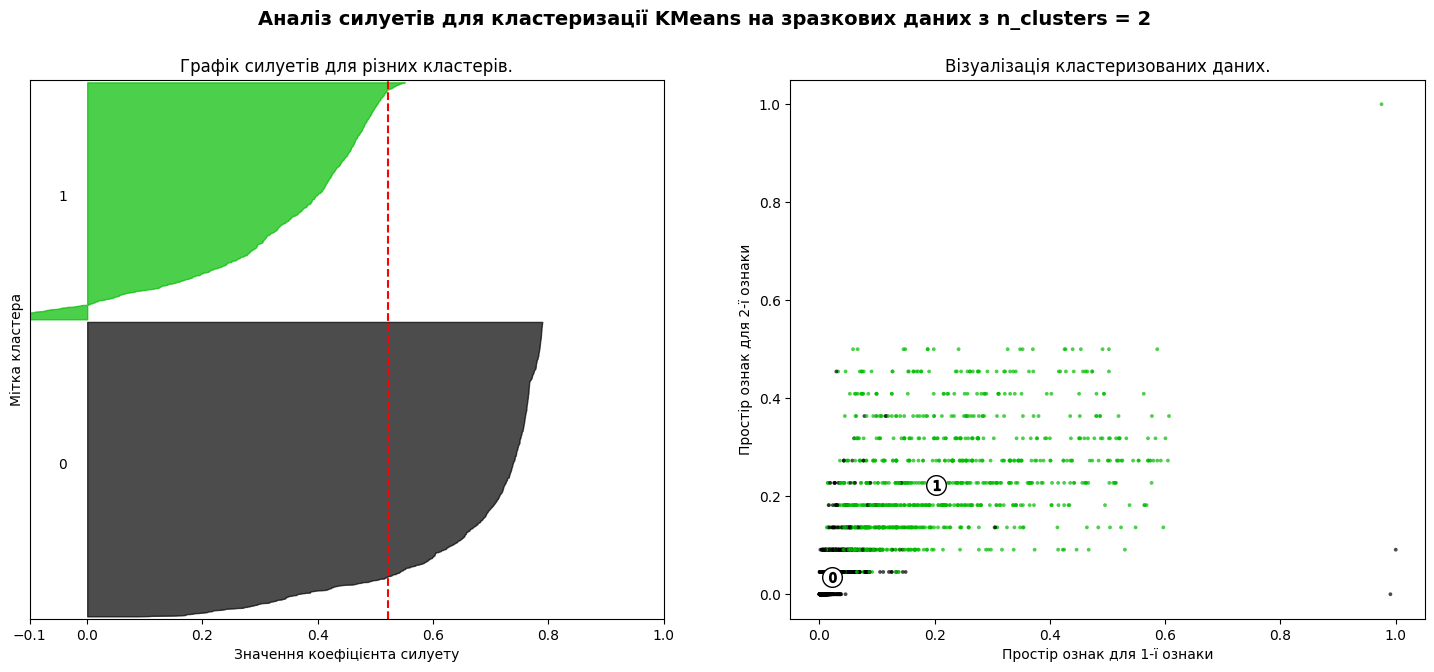

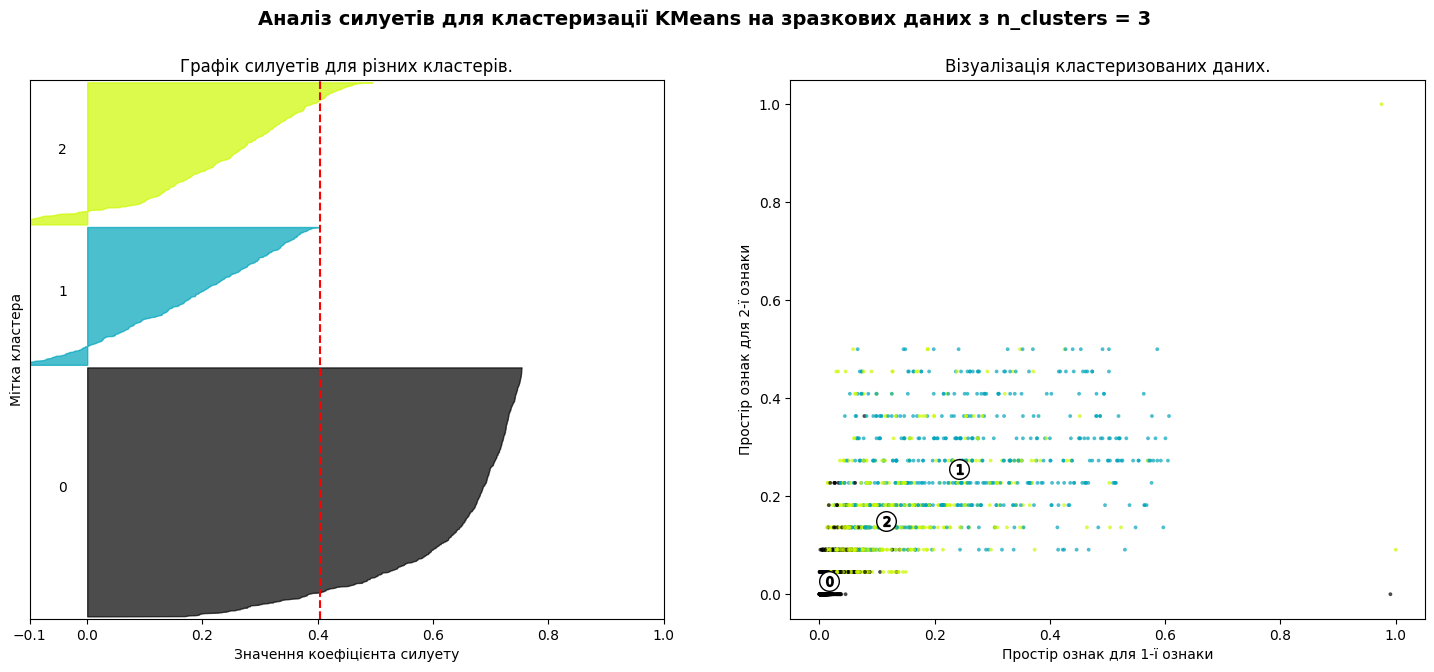

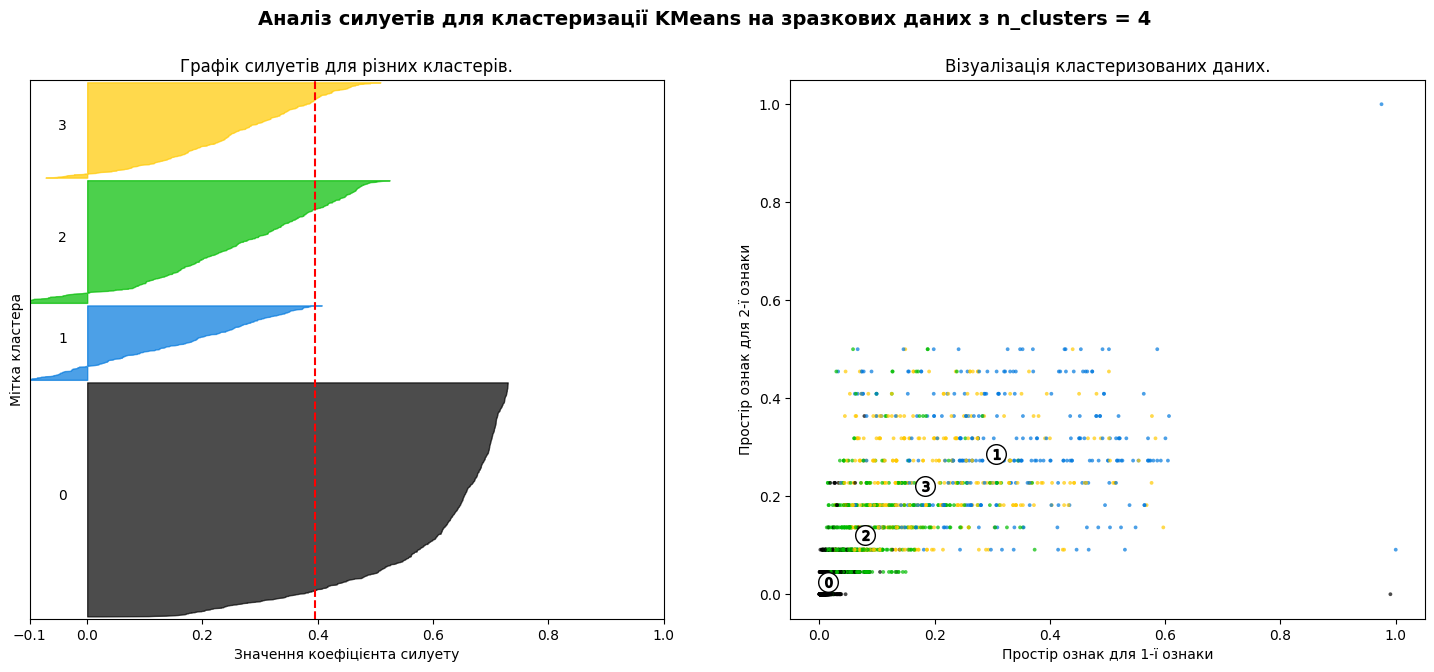

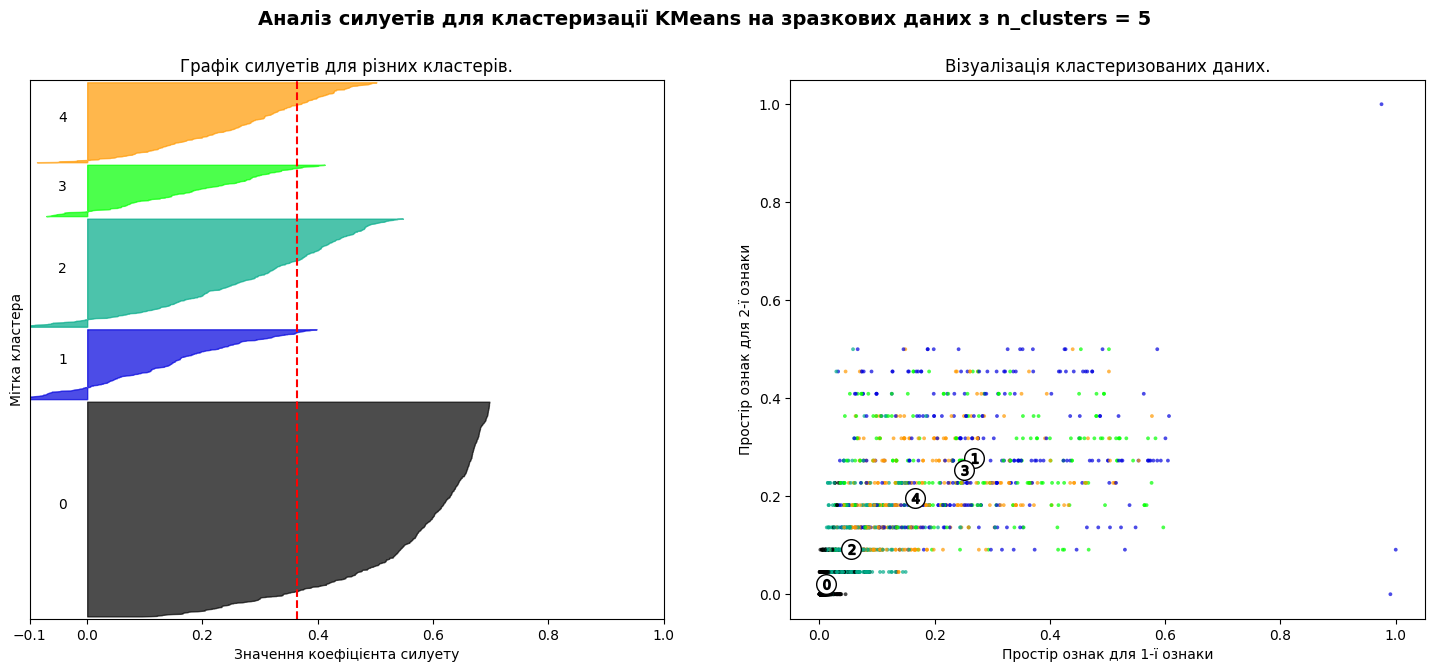

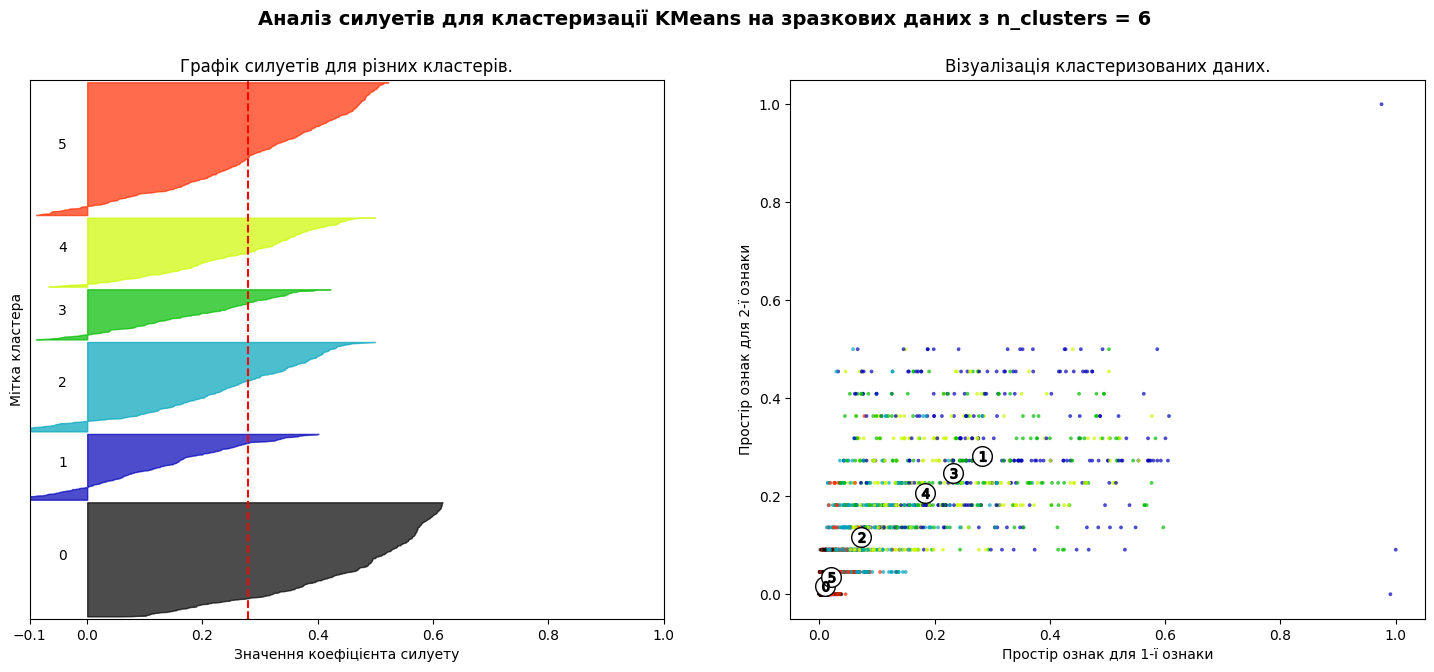

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й підграфік - це графік силуетів
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_top_features) + (n_clusters + 1) * 10])

    # Ініціюємо кластеризатор
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(X_top_features)
    silhouette_avg = silhouette_score(X_top_features, cluster_labels)
    print("Для n_clusters =", n_clusters, "Середнє значення silhouette_score становить:", silhouette_avg)

    # Розраховуємо метрику силуету для кожного екземпляра в наборі даних
    sample_silhouette_values = silhouette_samples(X_top_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Графік силуетів для різних кластерів.")
    ax1.set_xlabel("Значення коефіцієнта силуету")
    ax1.set_ylabel("Мітка кластера")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й підграфік, що показує фактично сформовані кластери
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_top_features.iloc[:, 0], X_top_features.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Центри кластерів
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Візуалізація кластеризованих даних.")
    ax2.set_xlabel("Простір ознак для 1-ї ознаки")
    ax2.set_ylabel("Простір ознак для 2-ї ознаки")

    plt.suptitle(
        "Аналіз силуетів для кластеризації KMeans на зразкових даних з n_clusters = %d" % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Результат покращився, але загалом я вже визначила кращий результат (0,71) іншим методом.